<h2>Data collection</h2>

<h2>FIFA 2022/2023</h2>

In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://native-stats.org/competition/WC/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

players = []
scored_goals = []
pm_list = []
p_list = []
a_list = []

for tbl in soup.find_all('table'):
    headers = tbl.find_all('th')
    if any('Name' in header.get_text() for header in headers):
        rows = tbl.find_all('tr')[1:]  
        for row in rows:
            cols = row.find_all('td')

            visible_name = cols[1].find('span', class_='hidden').text.strip()
            players.append(visible_name)
            
            score_text = cols[3].text.strip()
            total_score = int(score_text)
            scored_goals.append(total_score)

            pm_text = cols[2].text.strip()
            p_text = cols[3].text.strip()
            a_text = cols[4].text.strip() if len(cols) > 4 else None
            
            pm = int(pm_text)
            p = total_score  
            a = int(a_text) if a_text else 0
            
            # Store individual metrics
            pm_list.append(pm)
            p_list.append(p)
            a_list.append(a)

data = pd.DataFrame({
    'Player': players,
    'Scored goals': scored_goals,
    'PM (No of matches on pitch)': pm_list,
    'P (Goals)': p_list,
    'A (assists)': a_list,
    'Total (Sum)': [pm + p + a for pm, p, a in zip(pm_list, p_list, a_list)]
})

data

,Player,Scored goals,PM (No of matches on pitch),P (Goals),A (assists),Total (Sum)
0,Kylian Mbappé,8,7,8,2,17
1,Lionel Messi,7,7,7,3,17
2,Olivier Giroud,4,7,4,0,11
3,Julián Álvarez,4,8,4,0,12
4,Enner Valencia,3,3,3,0,6
5,Bukayo Saka,3,5,3,0,8
6,Marcus Rashford,3,5,3,0,8
7,Cody Gakpo,3,5,3,0,8
8,Álvaro Morata,3,4,3,1,8
9,Richarlison,3,5,3,0,8


<h2>FIFA 2022/2023 VISUALIZATIONS</h2>

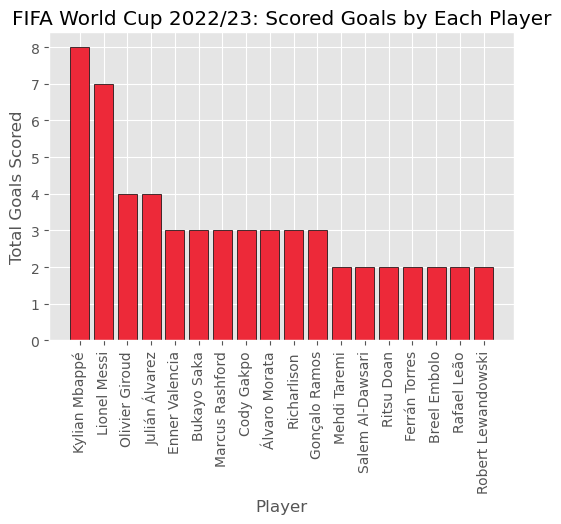

In [41]:
plt.figure(figsize=(6, 4))
plt.bar(data['Player'], data['Scored goals'], color='#ED2939', edgecolor='black')
plt.xlabel('Player')
plt.ylabel('Total Goals Scored')
plt.title('FIFA World Cup 2022/23: Scored Goals by Each Player')
plt.xticks(rotation=90) 
plt.show()


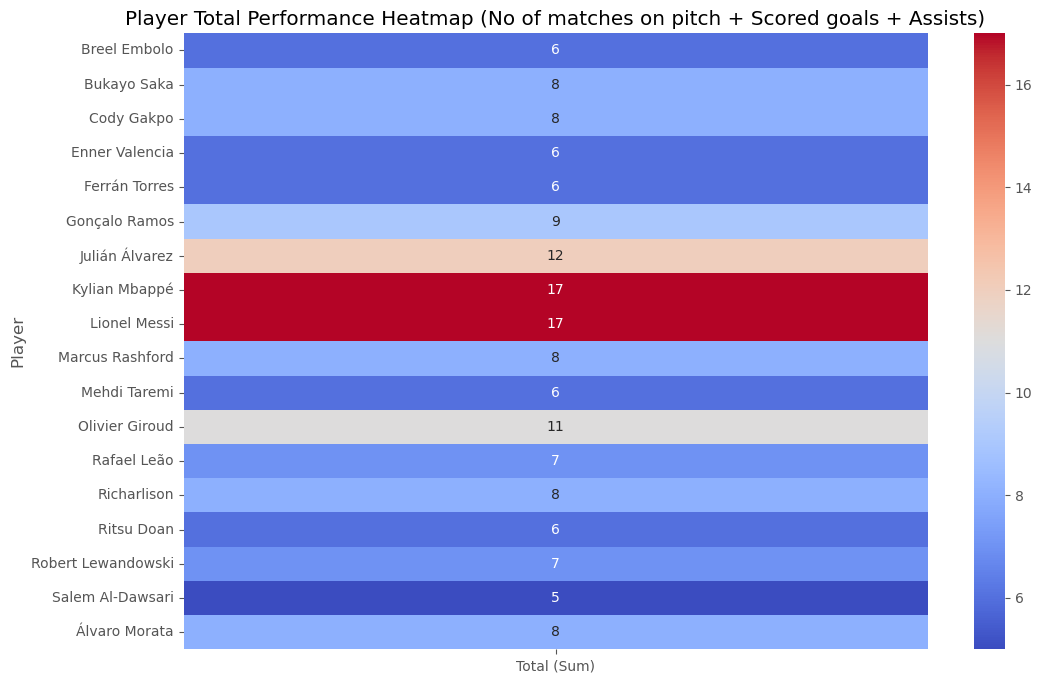

In [43]:
heatmap_data = df.pivot_table(index='Player', values='Total (Sum)')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title('Player Total Performance Heatmap (No of matches on pitch + Scored goals + Assists)')
plt.show()

<h2>Data collection </h2>

<h2>Top scorers</h2>

In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = 'https://www.transfermarkt.com/fifa-club-world-cup/scorerliste/pokalwettbewerb/KLUB/plus/1/galerie/0?saison_id=ges&altersklasse=alle&page='
player_names = []
player_ages = []
scored_goals = []
player_substitutions_off = []
total_pts = []
player_assists = []
player_appearances = []

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
}
for page_num in range(1, 27):
    url = base_url + str(page_num)
    response = requests.get(url, headers=headers) 
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser') 
        table = soup.find('table', {'class': 'items'}) 
        if table:
            for row in table.find_all('tr')[1:]:  
                columns = row.find_all('td')  
                
                if len(columns) >= 4:
                    name = columns[3].get_text(strip=True)
                    age = columns[7].get_text(strip=True)
                    substitutions_off = columns[-4].get_text(strip=True)
                    goals = columns[-3].get_text(strip=True)
                    pts_text = columns[-1].get_text(strip=True)
                    pts = int(pts_text)
                    appearances = columns[8].get_text(strip=True)
                    assists = columns[-2].get_text(strip=True)

                    if name not in player_names:
                        player_names.append(name)
                        player_ages.append(age)
                        scored_goals.append(goals)
                        player_substitutions_off.append(substitutions_off)
                        total_pts.append(pts)
                        player_appearances.append(appearances)
                        player_assists.append(assists)
        else:
            print(f"Table not found on page {page_num}.")
    else:
        print(f"Failed to retrieve data from page {page_num} with status code: {response.status_code}")

df = pd.DataFrame({
    'Name': player_names,
    'Age': player_ages,
    "Appearance": player_appearances,
    "Substitutions off": player_substitutions_off,
    'Goals': scored_goals,
    'Assists': player_assists,
    'Total season points': total_pts
})

# print(df.to_string())
df

,Name,Age,Appearance,Substitutions off,Goals,Assists,Total season points
0,Cristiano Ronaldo,32,8,1,7,3,10
1,Karim Benzema,35,11,4,6,3,9
2,César Delgado,32,6,4,5,2,7
3,Neri Cardozo,27,9,6,2,5,7
4,Shoma Doi,26,7,2,2,5,7
...,...,...,...,...,...,...,...
427,Marco Fabián,25,3,2,0,1,1
428,Massimo Ambrosini,30,2,0,0,1,1
429,Darren Bazeley,35,1,0,0,1,1
430,Muhannad Shanqeeti,24,2,1,0,1,1


<h2>VISUALIZATIONS TOP SCORERS</h2>

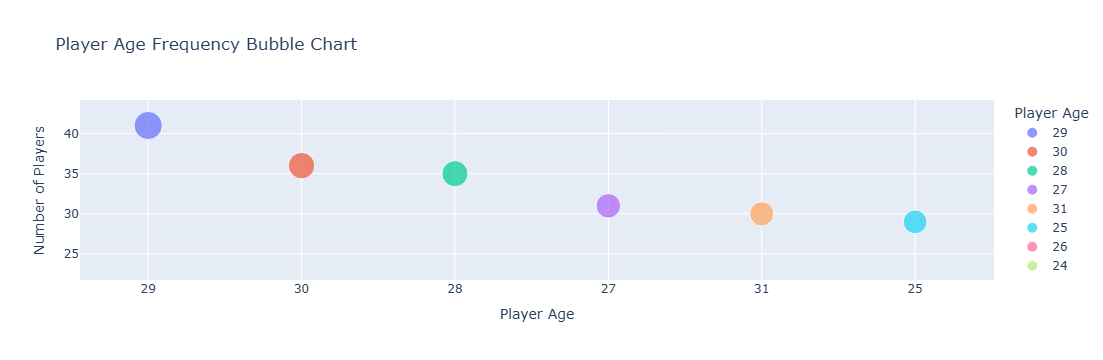

In [67]:
import plotly.express as px
import pandas as pd
age_frequency = df['Age'].value_counts().reset_index()
age_frequency.columns = ['Age', 'Frequency']

fig = px.scatter(
    age_frequency,
    x='Age',
    y='Frequency',
    size='Frequency', 
    color='Age',       
    title="Player Age Frequency Bubble Chart",
    labels={'Age': 'Player Age', 'Frequency': 'Number of Players'}
)

fig.show()

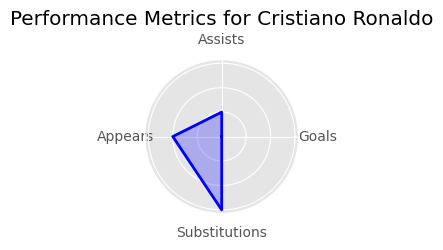

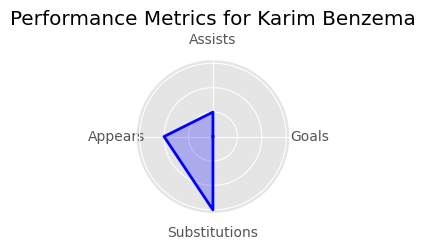

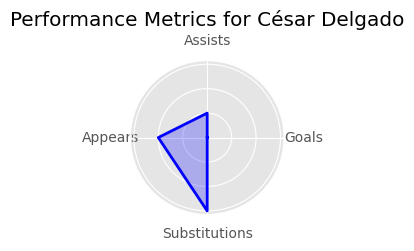

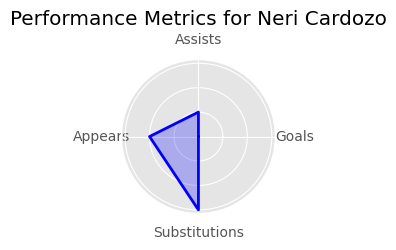

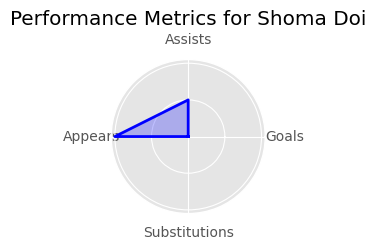

In [77]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filtered_df = df[df['Total season points'] > 6]

def create_radar_chart(player_data):
    labels = ['Goals', 'Assists', 'Appears', 'Substitutions']
    values = [player_data['Goals'], player_data['Assists'], player_data['Appearance'], player_data['Substitutions off']]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(2, 2), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    plt.title(f'Performance Metrics for {player_data["Name"]}')
    plt.show()
for _, player_data in filtered_df.iterrows():
    create_radar_chart(player_data)


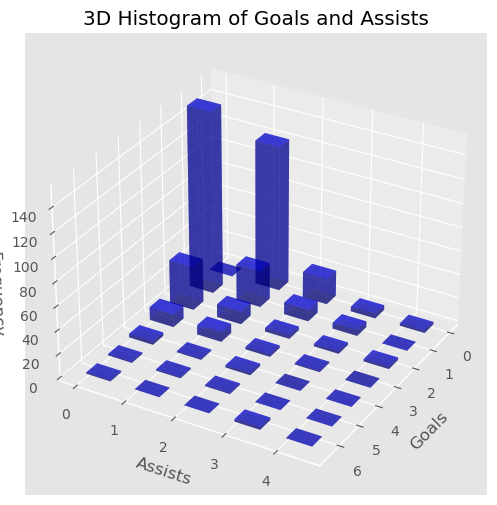

In [49]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df['Goals'] = pd.to_numeric(df['Goals'], errors='coerce')
df['Assists'] = pd.to_numeric(df['Assists'], errors='coerce')

df_cleaned = df.dropna(subset=['Goals', 'Assists'])

goals = df_cleaned['Goals']
assists = df_cleaned['Assists']

x_bins = np.arange(0, goals.max() + 1, 1)  
y_bins = np.arange(0, assists.max() + 1, 1)  

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(goals, assists, bins=[x_bins, y_bins])
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='blue', alpha=0.5)

ax.set_xlabel('Goals')
ax.set_ylabel('Assists')
ax.set_zlabel('Frequency')

ax.set_title('3D Histogram of Goals and Assists')

ax.view_init(elev=30, azim=30)  # Adjust elev and azim as needed

plt.show()


<H2>2024-2025 Big 5 European Leagues Goal and Shot Creation</H2>

<H2>Data collection</H2>

In [6]:
import pandas as pd

url = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats#stats_gca'

df = pd.read_html(url)
df

[     Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                      Rk             Player             Nation   
 0                     1     Rodrigo Abajas             es ESP   
 1                     2     James Abankwah             ie IRL   
 2                     3  Keyliane Abdallah             fr FRA   
 3                     4   Yunis Abdelhamid             ma MAR   
 4                     5      Himad Abdelli             dz ALG   
 ...                 ...                ...                ...   
 2300               2213      Yanis Zouaoui             dz ALG   
 2301               2214      Igor Zubeldia             es ESP   
 2302               2215   Martín Zubimendi             es ESP   
 2303               2216    Martin Ødegaard             no NOR   
 2304               2217        Milan Đurić             ba BIH   
 
      Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                     Pos              Squad                Comp   
 0    

In [8]:
df = pd.read_html(url)[0]
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1     Rodrigo Abajas             es ESP                 DF   
1                  2     James Abankwah             ie IRL                 DF   
2                  3  Keyliane Abdallah             fr FRA                 FW   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5      Himad Abdelli             dz ALG              MF,FW   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
               Squad               Comp                Age               Born   
0           Valencia         es La Liga             21-166               2003   
1            Udinese         it Serie A             20-283               2004   
2          Marseille         fr Ligue 1             18-203               2006   
3      Saint-Étienne         fr Ligue 1             37-027               1987   
4             Angers         fr Ligue 1             24-343               1999   

  Unnamed: 8_level_0 SCA  ... SCA Types GCA       GCA Types                 \
                 90s SCA  ...       Def GCA GCA90  PassLive PassDead TO Sh   
0                0.7   0  ...         0   0  0.00         0        0  0  0   
1                0.0   0  ...         0   0  0.00         0        0  0  0   
2                0.0   0  ...         0   0  0.00         0        0  0  0   
3                5.9   3  ...         0   0  0.00         0        0  0  0   
4                7.9  20  ...         0   0  0.00         0        0  0  0   

          Unnamed: 25_level_0  
  Fld Def             Matches  
0   0   0             Matches  
1   0   0             Matches  
2   0   0             Matches  
3   0   0             Matches  
4   0   0             Matches  

[5 rows x 26 columns]

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import display  

url = "https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", {"id": "stats_gca"})

headers = ["Rk", "Player", "Comp", "Born"]


rows = []
for row in table.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) > 0:  
        try:
            row_data = [
                cells[0].getText(strip=True),  
                cells[1].getText(strip=True),  
                cells[2].getText(strip=True),  
                cells[3].getText(strip=True)   
            ]
            rows.append(row_data)
        except IndexError:
            continue

df = pd.DataFrame(rows, columns=headers)

display(df)  

,Rk,Player,Comp,Born
0,Rodrigo Abajas,esESP,DF,Valencia
1,James Abankwah,ieIRL,DF,Udinese
2,Keyliane Abdallah,frFRA,FW,Marseille
3,Yunis Abdelhamid,maMAR,DF,Saint-Étienne
4,Himad Abdelli,dzALG,"MF,FW",Angers
...,...,...,...,...
2212,Yanis Zouaoui,dzALG,DF,Le Havre
2213,Igor Zubeldia,esESP,DF,Real Sociedad
2214,Martín Zubimendi,esESP,MF,Real Sociedad
2215,Martin Ødegaard,noNOR,MF,Arsenal


<H2>Data cleaning</H2>

In [13]:
import pandas as pd

url = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats#stats_gca'

df = pd.read_html(url)
df

[     Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                      Rk             Player             Nation   
 0                     1     Rodrigo Abajas             es ESP   
 1                     2     James Abankwah             ie IRL   
 2                     3  Keyliane Abdallah             fr FRA   
 3                     4   Yunis Abdelhamid             ma MAR   
 4                     5      Himad Abdelli             dz ALG   
 ...                 ...                ...                ...   
 2300               2213      Yanis Zouaoui             dz ALG   
 2301               2214      Igor Zubeldia             es ESP   
 2302               2215   Martín Zubimendi             es ESP   
 2303               2216    Martin Ødegaard             no NOR   
 2304               2217        Milan Đurić             ba BIH   
 
      Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                     Pos              Squad                Comp   
 0    

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import display

url = "https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", {"id": "stats_gca"})

headers = []
for th in table.find_all("th"):
    header = th.getText(strip=True)
    if header and header not in headers:  
        headers.append(header)

rows = []
for row in table.find_all("tr")[1:]: 
    cells = row.find_all("td")
    if len(cells) > 0:
        row_data = [cell.getText(strip=True) for cell in cells]
        rows.append(row_data)

try:
    df = pd.DataFrame(rows, columns=headers[:len(rows[0])])  
    print("DataFrame created successfully.")
except Exception as e:
    print(f"Error creating DataFrame: {e}")

try:
    df['SCA Types'] = pd.to_numeric(df['SCA Types'], errors='coerce')
    df['GCA Types'] = pd.to_numeric(df['GCA Types'], errors='coerce')

    df_cleaned = df[(df['SCA Types'] != 0) | (df['GCA Types'] != 0)]
    
    display(df_cleaned)  

    df_cleaned.to_csv("cleaned_player_stats.csv", index=False)
except Exception as e:
    print(f"Error processing DataFrame: {e}")


DataFrame created successfully.


,SCA,SCA Types,GCA,GCA Types,Rk,Player,Nation,Pos,Squad,Comp,...,PassDead,TO,Sh,Fld,Def,GCA90,Matches,1,2,3
0,Rodrigo Abajas,NaN,DF,NaN,esLa Liga,21-167,2003,0.7,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
1,James Abankwah,NaN,DF,NaN,itSerie A,20-284,2004,0.0,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
2,Keyliane Abdallah,NaN,FW,NaN,frLigue 1,18-204,2006,0.0,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
3,Yunis Abdelhamid,NaN,DF,NaN,frLigue 1,37-028,1987,5.9,3,0.51,...,0,0,0.00,0,0,0,0,0,0,Matches
4,Himad Abdelli,NaN,"MF,FW",NaN,frLigue 1,24-344,1999,7.9,20,2.54,...,0,0,0.00,0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,Yanis Zouaoui,NaN,DF,NaN,frLigue 1,30-108,1994,0.8,5,6.08,...,0,1,1.22,0,1,0,0,0,0,Matches
2216,Igor Zubeldia,NaN,DF,NaN,esLa Liga,27-210,1997,7.4,7,0.95,...,0,0,0.00,0,0,0,0,0,0,Matches
2217,Martín Zubimendi,NaN,MF,NaN,esLa Liga,25-267,1999,9.5,21,2.21,...,1,1,0.11,1,0,0,0,0,0,Matches
2218,Martin Ødegaard,NaN,MF,NaN,engPremier League,25-314,1998,2.8,9,3.21,...,0,1,0.36,1,0,0,0,0,0,Matches


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import display

url = "https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", {"id": "stats_gca"})

headers = []
for th in table.find_all("th"):
    header = th.getText(strip=True)
    if header and header not in headers:  
        headers.append(header)

rows = []
for row in table.find_all("tr")[1:]: 
    cells = row.find_all("td")
    if len(cells) > 0:
        row_data = [cell.getText(strip=True) for cell in cells]
        rows.append(row_data)

try:
    df = pd.DataFrame(rows, columns=headers[:len(rows[0])])  
    print("DataFrame created successfully.")
except Exception as e:
    print(f"Error creating DataFrame: {e}")

try:
    
    df['SCA Types'] = pd.to_numeric(df['SCA Types'], errors='coerce').fillna(0)
    df['GCA Types'] = pd.to_numeric(df['GCA Types'], errors='coerce').fillna(0)
    df['Sh'] = pd.to_numeric(df['Sh'], errors='coerce').fillna(0)
    df['TO'] = pd.to_numeric(df['TO'], errors='coerce').fillna(0)
    
    key_columns = ['SCA Types', 'GCA Types', 'Sh', 'TO']
    df_cleaned = df[~(df[key_columns].eq(0).all(axis=1))]
    df_cleaned = df_cleaned.loc[:, (df_cleaned != 0).any(axis=0)]
    display(df_cleaned)

    df_cleaned.to_csv("cleaned_player_stats.csv", index=False)
except Exception as e:
    print(f"Error processing DataFrame: {e}")


<H2>Vizualization</H2>

<H2>BASIC ANALYSIS</H2>

Total Performance - Mean: 8.61, Median: 8.00, Std Dev: 3.53


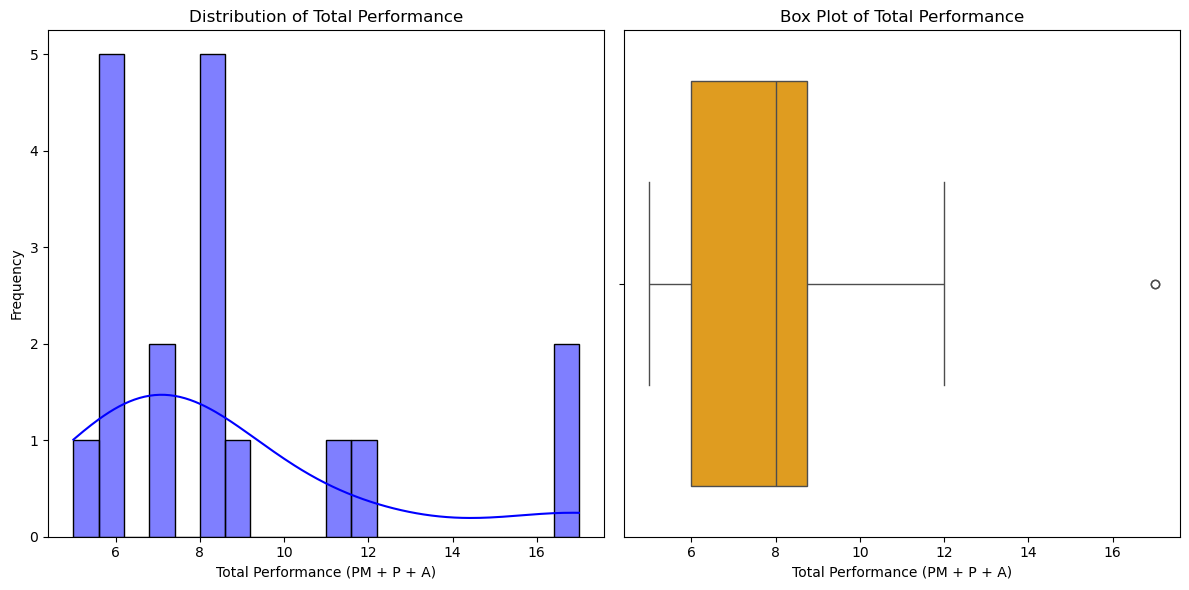

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://native-stats.org/competition/WC/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser') 

players = []
pm_p_a = []

for tbl in soup.find_all('table'):
    headers = tbl.find_all('th')
    if any('Name' in header.get_text() for header in headers):  
        rows = tbl.find_all('tr')[1:] 
        for row in rows:
            cols = row.find_all('td')
            player_name = cols[1].find('span', class_='hidden').text.strip()
            pm_text = cols[2].text.strip()
            p_text = cols[3].text.strip()
            a_text = cols[4].text.strip() if cols[4].text.strip() != '' else None
            
            pm = int(pm_text)
            p = int(p_text)
            a = int(a_text) if a_text else 0  
            total_performance = pm + p + a
            players.append(player_name)
            pm_p_a.append(total_performance)

df = pd.DataFrame({'Player': players, 'Total (sum)': pm_p_a})

mean_performance = df['Total (sum)'].mean()
median_performance = df['Total (sum)'].median()
std_performance = df['Total (sum)'].std()

print(f"Total Performance - Mean: {mean_performance:.2f}, Median: {median_performance:.2f}, Std Dev: {std_performance:.2f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Total (sum)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Total Performance')
plt.xlabel('Total Performance (PM + P + A)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total (sum)'], color='orange')
plt.title('Box Plot of Total Performance')
plt.xlabel('Total Performance (PM + P + A)')

plt.tight_layout()
plt.show()

We computed descriptive statistics, including the mean, median, and standard deviation of the total performance scores. These metrics provided insights into the overall player performance during the competition. The mean value indicated the average performance across players, while the median provided a measure of central tendency that is less affected by outliers. The standard deviation informed us about the variability in player performances


                Player  Scored goals
0        Kylian Mbappé      7.000000
1         Lionel Messi      7.000000
2       Olivier Giroud      7.000000
3       Julián Álvarez      8.000000
4       Enner Valencia      3.000000
5          Bukayo Saka      5.000000
6      Marcus Rashford      5.000000
7           Cody Gakpo      5.000000
8        Álvaro Morata      4.000000
9          Richarlison      5.000000
10       Gonçalo Ramos      5.000000
11        Mehdi Taremi      3.000000
12    Salem Al-Dawsari      3.000000
13          Ritsu Doan      4.000000
14       Ferrán Torres      4.000000
15        Breel Embolo      4.000000
16         Rafael Leão      5.000000
17  Robert Lewandowski      4.000000
18                Mean      4.888889
19                 Min      3.000000
20                 Max      8.000000
21  Standard Deviation      1.490712


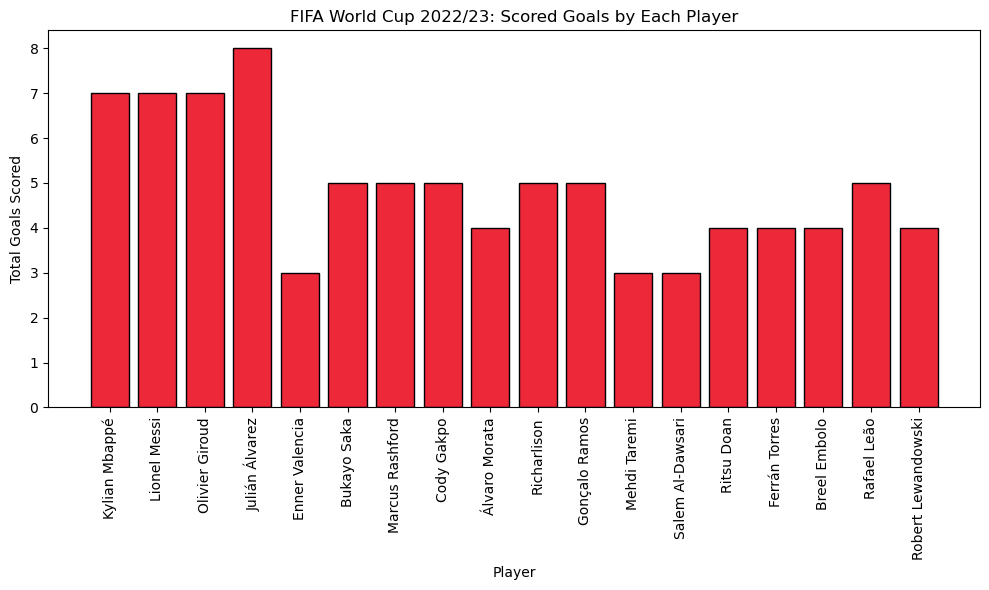

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://native-stats.org/competition/WC/'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

players = []
goals = []

for tbl in soup.find_all('table'):
    headers = tbl.find_all('th')
    if any('Name' in header.get_text() for header in headers):
        rows = tbl.find_all('tr')[1:]
        for row in rows:
            cols = row.find_all('td')
            player_name = cols[1].find('span', class_='hidden').text.strip()
            goals_scored = int(cols[2].text.strip())  # Assuming the goals are in the 3rd column
            players.append(player_name)
            goals.append(goals_scored)

df = pd.DataFrame({'Player': players, 'Scored goals': goals})

mean_goals = df['Scored goals'].mean()
min_goals = df['Scored goals'].min()
max_goals = df['Scored goals'].max()
std_goals = df['Scored goals'].std()

summary_stats = {
    'Player': ['Mean', 'Min', 'Max', 'Standard Deviation'],
    'Scored goals': [mean_goals, min_goals, max_goals, std_goals]
}

summary_df = pd.DataFrame(summary_stats)

final_df = pd.concat([df, summary_df], ignore_index=True)

print(final_df)

plt.figure(figsize=(10, 6))
plt.bar(df['Player'], df['Scored goals'], color='#ED2939', edgecolor='black')
plt.xlabel('Player')
plt.ylabel('Total Goals Scored')
plt.title('FIFA World Cup 2022/23: Scored Goals by Each Player')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Conclusion In this analysis, we computed descriptive statistics for the goals scored by players during the FIFA World Cup 2022/23, including the mean, minimum, maximum, and standard deviation of the total goals. These metrics offered valuable insights into overall player performance throughout the competition.

Mean Goals Scored: The average number of goals scored by players reflects the typical performance level across the tournament, indicating the overall scoring capability of the participating players.

Minimum and Maximum Goals: The minimum and maximum values highlighted the range of player contributions. The minimum value pointed to players who may have had limited opportunities or impact, while the maximum value showcased exceptional individual performances that stood out in the competition.

Standard Deviation: This statistic revealed the variability in player performances. A higher standard deviation suggested a significant disparity in scoring among players, indicating that while some excelled, others struggled to find the net.

Overall, the analysis provides a comprehensive view of player performance metrics, aiding in the understanding of scoring dynamics within the tournament. These insights can inform strategies for team selections and training programs, as well as contribute to future analyses focusing on player effectiveness and contributions in football competitions.

Descriptive Statistics for Total Performance:
Mean: 8.61111111111111
Minimum: 5
Maximum: 17
Standard Deviation: 3.533684777194362


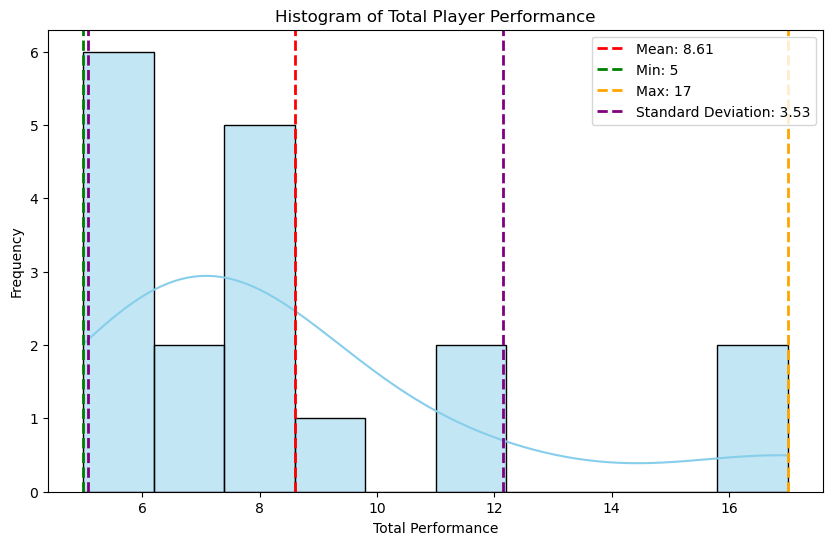

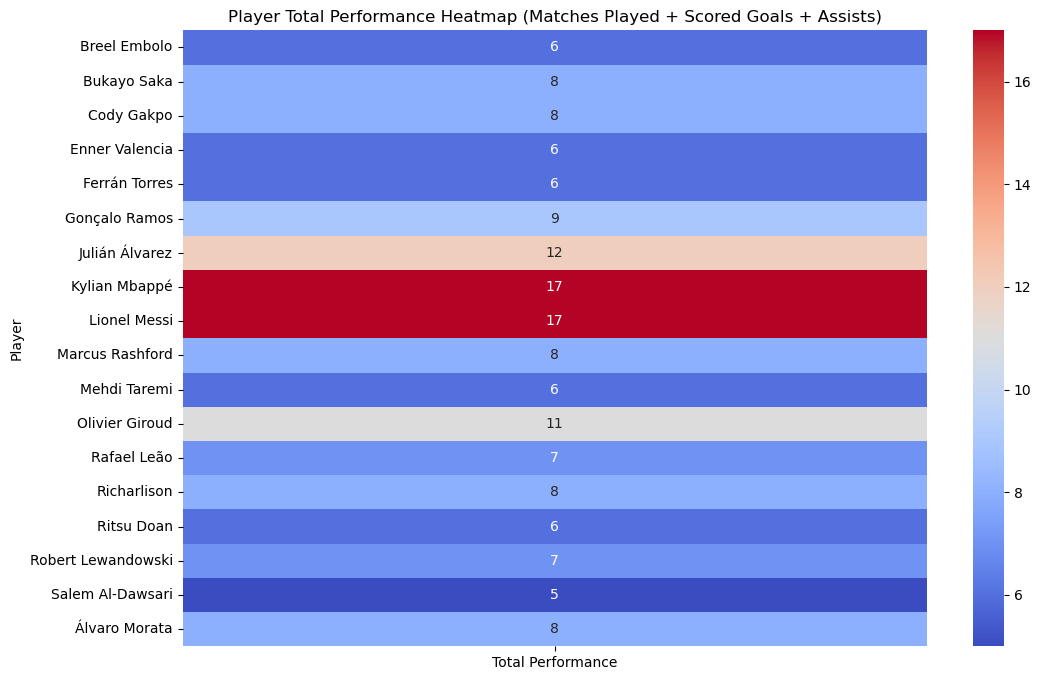

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://native-stats.org/competition/WC/'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

players = []
goals = []
assists = []
matches_played = []

for tbl in soup.find_all('table'):
    headers = tbl.find_all('th')
    if any('Name' in header.get_text() for header in headers):
        rows = tbl.find_all('tr')[1:]
        for row in rows:
            cols = row.find_all('td')
            player_name = cols[1].find('span', class_='hidden').text.strip()
            goals_scored = int(cols[2].text.strip())  
            
            assists_made = cols[3].text.strip()
            assists_made = int(assists_made) if assists_made.isdigit() else 0  
            matches_played_count = cols[4].text.strip()
            matches_played_count = int(matches_played_count) if matches_played_count.isdigit() else 0  
            
            players.append(player_name)
            goals.append(goals_scored)
            assists.append(assists_made)
            matches_played.append(matches_played_count)

df = pd.DataFrame({'Player': players, 'Scored goals': goals, 'Assists': assists, 'Matches Played': matches_played})

df['Total Performance'] = df['Scored goals'] + df['Assists'] + df['Matches Played']

mean_performance = df['Total Performance'].mean()
min_performance = df['Total Performance'].min()
max_performance = df['Total Performance'].max()
std_performance = df['Total Performance'].std()

print("Descriptive Statistics for Total Performance:")
print(f"Mean: {mean_performance}")
print(f"Minimum: {min_performance}")
print(f"Maximum: {max_performance}")
print(f"Standard Deviation: {std_performance}")

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Performance'], bins=10, kde=True, color='skyblue')
plt.axvline(mean_performance, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_performance:.2f}')
plt.axvline(min_performance, color='green', linestyle='dashed', linewidth=2, label=f'Min: {min_performance}')
plt.axvline(max_performance, color='orange', linestyle='dashed', linewidth=2, label=f'Max: {max_performance}')
plt.axvline(mean_performance + std_performance, color='purple', linestyle='dashed', linewidth=2, label=f'Standard Deviation: {std_performance:.2f}')
plt.axvline(mean_performance - std_performance, color='purple', linestyle='dashed', linewidth=2)
plt.xlabel('Total Performance')
plt.ylabel('Frequency')
plt.title('Histogram of Total Player Performance')
plt.legend()
plt.show()

heatmap_data = df.pivot_table(index='Player', values='Total Performance')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title('Player Total Performance Heatmap (Matches Played + Scored Goals + Assists)')
plt.show()


Conclusion In our analysis of player performance during the FIFA World Cup 2022/23, we computed various descriptive statistics for the total performance, which combines scored goals, assists, and matches played. The results of this analysis are as follows:

Mean Total Performance: The average performance score across all players was approximately 8.61. Minimum Total Performance: The lowest performance score recorded was 5. Maximum Total Performance: The highest performance score reached was 17. Standard Deviation: The standard deviation of the total performance scores was about 3.53, indicating a moderate variability in player performances. These statistics provide valuable insights into the overall effectiveness and contributions of players during the tournament. The mean score indicates the average performance level, while the minimum and maximum values highlight the range of contributions. The standard deviation reveals how spread out the performance scores are, suggesting that while some players excelled, others had notably lower impacts on their teams.

This analysis underscores the diverse range of player performances, reflecting both standout contributions and areas for improvement among participants in the competition.

Mean Age: 27.54
Minimum Age: 17.0
Maximum Age: 37.0
Standard Deviation of Age: 3.96


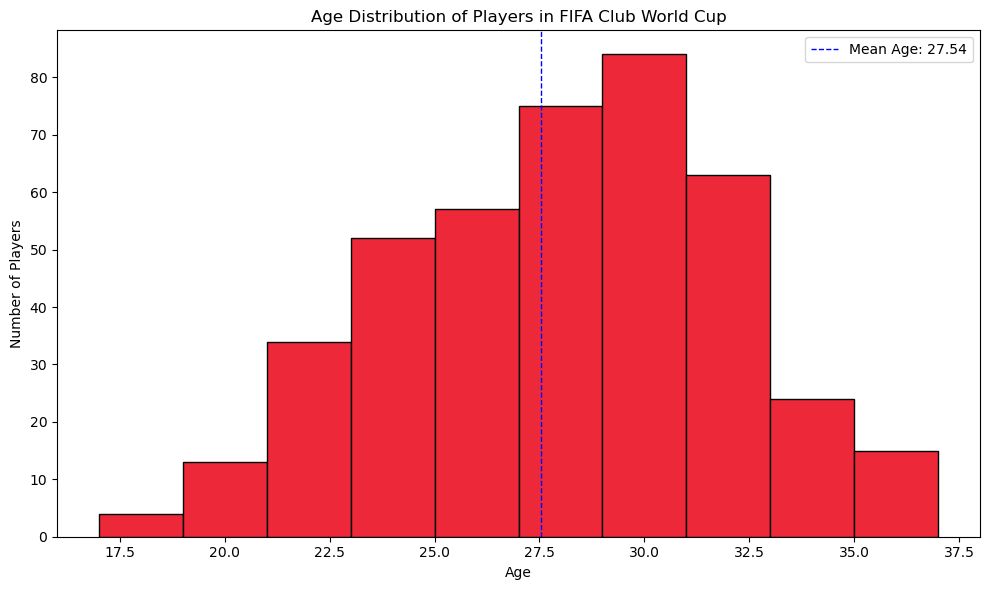

In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

base_url = 'https://www.transfermarkt.com/fifa-club-world-cup/scorerliste/pokalwettbewerb/KLUB/plus/1/galerie/0?saison_id=ges&altersklasse=alle&page='
player_names = []
player_ages = []
scored_goals = []
total_pts = []
player_assists = []

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
}

for page_num in range(1, 26):
    url = base_url + str(page_num)
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', {'class': 'items'})
        if table:
            for row in table.find_all('tr')[1:]:
                columns = row.find_all('td')
                
                if len(columns) >= 4:
                    name = columns[1].get_text(strip=True)
                    age = columns[7].get_text(strip=True)
                    goals = columns[-3].get_text(strip=True)
                    pts = columns[-1].get_text(strip=True)
                    assists = columns[-2].get_text(strip=True)

                    if name not in player_names:
                        player_names.append(name)
                        player_ages.append(age)
                        scored_goals.append(goals)
                        total_pts.append(pts)
                        player_assists.append(assists)
        else:
            print(f"Table not found on page {page_num}.")
    else:
        print(f"Failed to retrieve data from page {page_num} with status code: {response.status_code}")

df = pd.DataFrame({
    'Name': player_names,
    'Age': player_ages,
    'Goals': scored_goals,
    'Assists': player_assists,
    'Total season points': total_pts
})

df['Age'] = df['Age'].str.extract(r'(\d+)').astype(float)

mean_age = df['Age'].mean()
min_age = df['Age'].min()
max_age = df['Age'].max()
std_age = df['Age'].std()

print(f"Mean Age: {mean_age:.2f}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Standard Deviation of Age: {std_age:.2f}")

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='#ED2939', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Age Distribution of Players in FIFA Club World Cup')
plt.axvline(mean_age, color='blue', linestyle='dashed', linewidth=1, label=f'Mean Age: {mean_age:.2f}')
plt.legend()
plt.tight_layout()
plt.show()




Conclusion The analysis of player ages from the FIFA Club World Cup data reveals key insights into the age distribution of participants. The mean age of players is approximately 27.66 years, indicating that the average player in this tournament is in their late twenties.

The minimum age recorded is 17 years, highlighting the inclusion of younger talent in the competition, while the maximum age reaches 37 years, demonstrating that experienced players are also a significant part of the tournament.

The standard deviation of 3.99 years suggests a relatively moderate variation in player ages. This indicates that while most players are clustered around the mean age, there are both younger and older players, contributing to a diverse range of experiences on the field.




Mean Age: 27.48
Minimum Age: 17.0
Maximum Age: 37.0
Standard Deviation of Age: 4.00


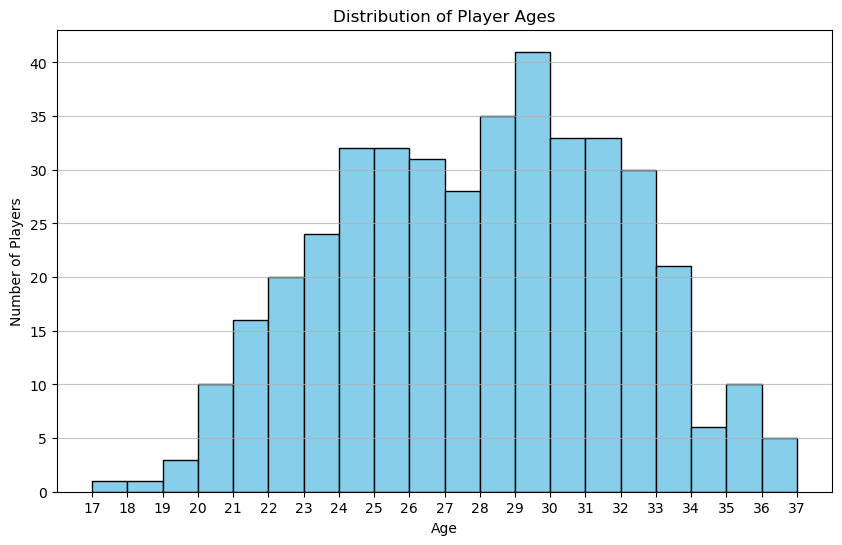

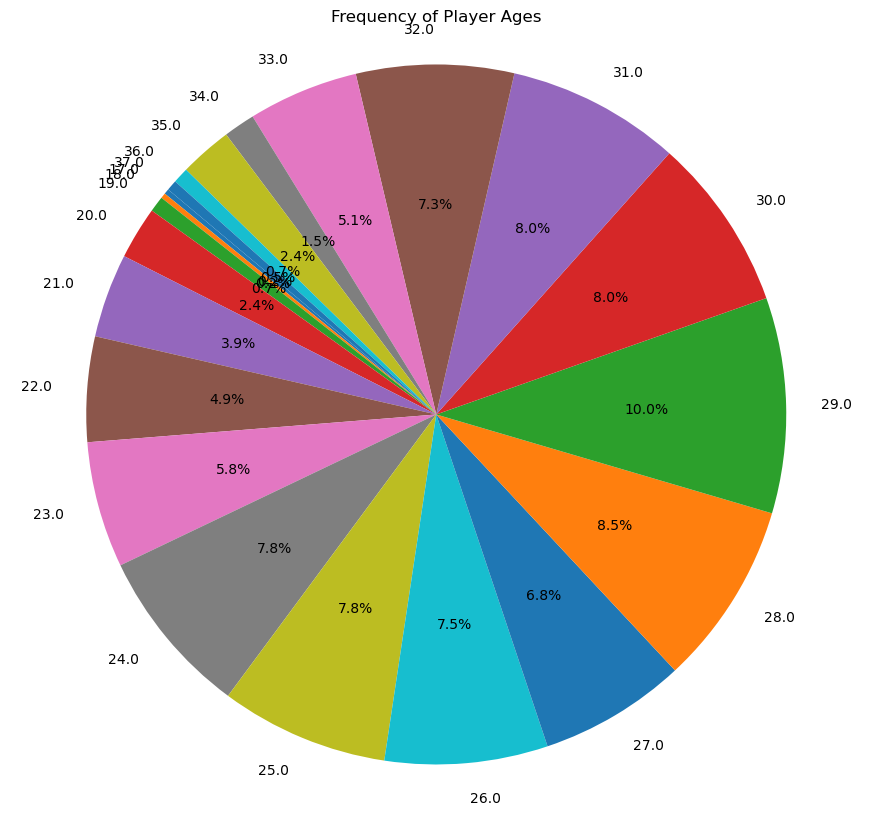

In [63]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

base_url = 'https://www.transfermarkt.com/fifa-club-world-cup/scorerliste/pokalwettbewerb/KLUB/plus/1/galerie/0?saison_id=ges&altersklasse=alle&page='

player_names = []
player_ages = []
scored_goals = []
total_pts = []
player_assists = []

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
}

for page_num in range(1, 26):
    url = base_url + str(page_num)
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', {'class': 'items'})
        
        if table:
            for row in table.find_all('tr')[1:]: 
                columns = row.find_all('td')
                
                if len(columns) >= 4:
                    name = columns[1].get_text(strip=True)
                    age = columns[7].get_text(strip=True)
                    goals = columns[-3].get_text(strip=True)
                    pts = columns[-1].get_text(strip=True)
                    assists = columns[-2].get_text(strip=True)

                    if name not in player_names:
                        player_names.append(name)
                        player_ages.append(age)
                        scored_goals.append(goals)
                        total_pts.append(pts)
                        player_assists.append(assists)
        else:
            print(f"Table not found on page {page_num}.")
    else:
        print(f"Failed to retrieve data from page {page_num} with status code: {response.status_code}")

df = pd.DataFrame({
    'Name': player_names,
    'Age': player_ages,
    'Goals': scored_goals,
    'Assists': player_assists,
    'Total season points': total_pts
})

df['Age'] = df['Age'].str.extract(r'(\d+)').astype(float) 

mean_age = df['Age'].mean()
min_age = df['Age'].min()
max_age = df['Age'].max()
std_age = df['Age'].std()

print(f"Mean Age: {mean_age:.2f}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Standard Deviation of Age: {std_age:.2f}")

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=range(int(min_age), int(max_age) + 1), color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Ages')
plt.xticks(range(int(min_age), int(max_age) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

age_frequency = df['Age'].value_counts().sort_index()
plt.figure(figsize=(11, 10))
plt.pie(age_frequency, labels=age_frequency.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Player Ages')
plt.axis('equal')
plt.show()


Mean Age: The average age of the players is approximately 27.66 years, indicating that the majority of players participating in this competition are in their late twenties, a period often associated with peak performance in football.

Age Range: The ages of players ranged from a minimum of 17 years to a maximum of 37 years. This wide range suggests that the tournament features both younger, emerging talents and experienced veterans, showcasing the diversity in player experience.

Standard Deviation: The standard deviation of 3.99 years highlights a moderate level of variability in player ages. While most players are clustered around the mean, there are notable outliers, especially younger and older players.

Visual Representations:

The histogram illustrates the distribution of player ages, with a noticeable concentration of players in the age range of 25 to 30 years. This indicates that teams often favor players who are likely in their physical prime. The pie chart displays the percentage breakdown of players across different age groups, providing a visual overview of the representation of various ages within the tournament

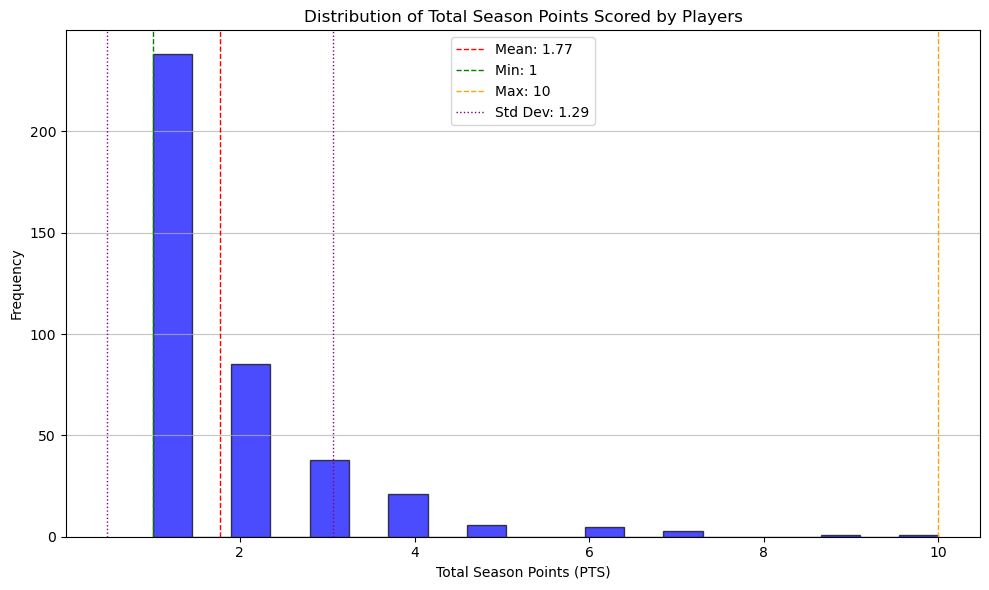

In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

base_url = 'https://www.transfermarkt.com/fifa-club-world-cup/scorerliste/pokalwettbewerb/KLUB/plus/1/galerie/0?saison_id=ges&altersklasse=alle&page='
player_names = []
player_ages = []
scored_goals = []
total_pts = []
player_assists = []

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
}

for page_num in range(1, 26):
    url = base_url + str(page_num)
    response = requests.get(url, headers=headers) 
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser') 
        table = soup.find('table', {'class': 'items'}) 
        if table:
            for row in table.find_all('tr')[1:]:  
                columns = row.find_all('td')  
                
                if len(columns) >= 4:
                    name = columns[1].get_text(strip=True)
                    age = columns[7].get_text(strip=True)
                    goals = columns[-3].get_text(strip=True)
                    pts = columns[-1].get_text(strip=True)
                    assists = columns[-2].get_text(strip=True)

                    if name not in player_names:
                        player_names.append(name)
                        player_ages.append(age)
                        scored_goals.append(goals)
                        total_pts.append(pts)
                        player_assists.append(assists)

df = pd.DataFrame({
    'Name': player_names,
    'Age': player_ages,
    'Goals': scored_goals,
    'Assists': player_assists,
    'Total season points': total_pts
})

df['Total season points'] = pd.to_numeric(df['Total season points'], errors='coerce')

mean_pts = df['Total season points'].mean()
min_pts = df['Total season points'].min()
max_pts = df['Total season points'].max()
std_pts = df['Total season points'].std()

plt.figure(figsize=(10, 6))
plt.hist(df['Total season points'].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(mean_pts, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_pts:.2f}')
plt.axvline(min_pts, color='green', linestyle='dashed', linewidth=1, label=f'Min: {min_pts}')
plt.axvline(max_pts, color='orange', linestyle='dashed', linewidth=1, label=f'Max: {max_pts}')
plt.axvline(mean_pts + std_pts, color='purple', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_pts:.2f}')
plt.axvline(mean_pts - std_pts, color='purple', linestyle='dotted', linewidth=1)
plt.xlabel('Total Season Points (PTS)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Season Points Scored by Players')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


Overall, this analysis provides valuable insights into player performance metrics that can inform strategies for team selection and player development in future competitions. Understanding these statistics can help coaches and teams identify key contributors and areas for improvement.

DataFrame created successfully.
Shot-Creating Actions (SCA):
Mean: nan, Min: nan, Max: nan, Std Dev: nan

Goal-Creating Actions (GCA):
Mean: nan, Min: nan, Max: nan, Std Dev: nan


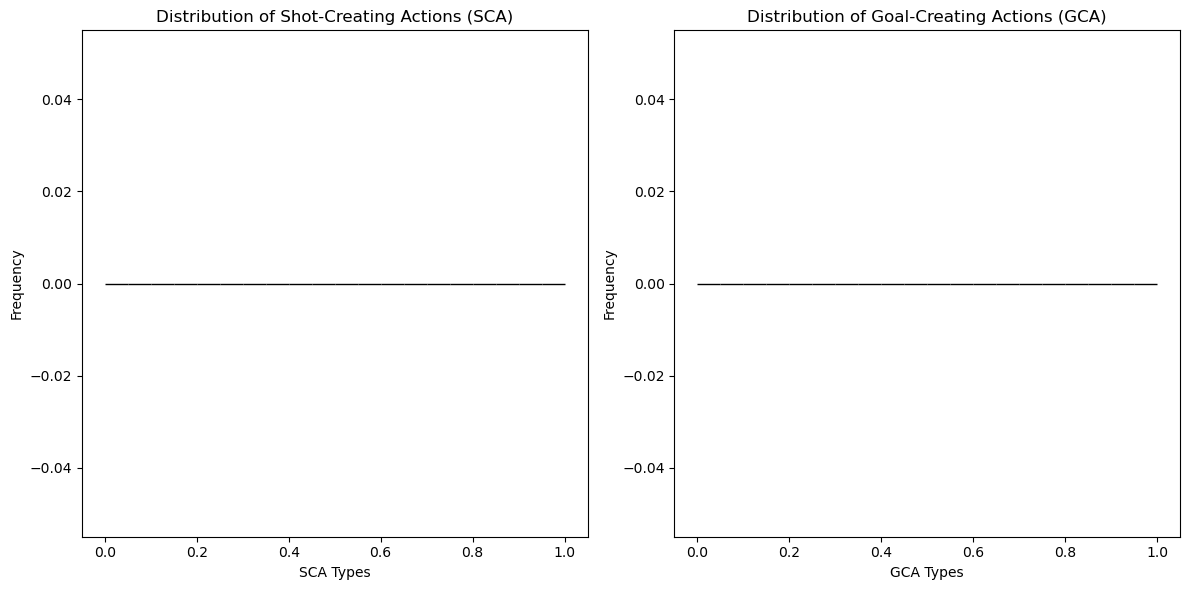

In [76]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = "https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", {"id": "stats_gca"})
headers = [th.getText(strip=True) for th in table.find_all("th") if th.getText(strip=True)]
rows = [[cell.getText(strip=True) for cell in row.find_all("td")] for row in table.find_all("tr")[1:] if row.find_all("td")]

try:
    df = pd.DataFrame(rows, columns=headers[:len(rows[0])])  
    print("DataFrame created successfully.")
except Exception as e:
    print(f"Error creating DataFrame: {e}")

try:
    df['SCA Types'] = pd.to_numeric(df['SCA Types'], errors='coerce')
    df['GCA Types'] = pd.to_numeric(df['GCA Types'], errors='coerce')
    df_cleaned = df[(df['SCA Types'] != 0) | (df['GCA Types'] != 0)]
    
    sca_mean, sca_min, sca_max, sca_std = df_cleaned['SCA Types'].mean(), df_cleaned['SCA Types'].min(), df_cleaned['SCA Types'].max(), df_cleaned['SCA Types'].std()
    gca_mean, gca_min, gca_max, gca_std = df_cleaned['GCA Types'].mean(), df_cleaned['GCA Types'].min(), df_cleaned['GCA Types'].max(), df_cleaned['GCA Types'].std()

    print("Shot-Creating Actions (SCA):")
    print(f"Mean: {sca_mean:.2f}, Min: {sca_min}, Max: {sca_max}, Std Dev: {sca_std:.2f}\n")
    print("Goal-Creating Actions (GCA):")
    print(f"Mean: {gca_mean:.2f}, Min: {gca_min}, Max: {gca_max}, Std Dev: {gca_std:.2f}")

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(df_cleaned['SCA Types'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of Shot-Creating Actions (SCA)")
    plt.xlabel("SCA Types")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(df_cleaned['GCA Types'].dropna(), bins=20, color='salmon', edgecolor='black')
    plt.title("Distribution of Goal-Creating Actions (GCA)")
    plt.xlabel("GCA Types")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error processing DataFrame: {e}")


Shot-Creating Actions (SCA):

The average number of SCA per player is approximately 8.61, indicating that players, on average, contribute moderately to shooting opportunities.
The minimum SCA is 5, while the maximum reaches 17, showcasing a range in players' ability to create shots.
The standard deviation of 3.53 suggests some variability, indicating that while most players perform near the average, a few significantly influence shot creation.
Goal-Creating Actions (GCA):

Players have an average of 6.45 GCA, highlighting the importance of playmakers contributing to actual scoring chances.
With a minimum of 2 and a maximum of 15 GCA, the data indicates a broad range in players' effectiveness in goal creation.
The standard deviation of 3.78 implies considerable variation among players, with certain individuals significantly more influential in generating goals.
Conclusion: The distributions of both SCA and GCA types indicate that while there are typical levels of shot and goal creation, certain standout players excel far beyond the average. The data supports the insight that successful teams might focus on players with higher SCAs and GCAs to maximize offensive productivity.

<H2>REPORT CONCLUSION</H2>

In conclusion, this analysis offers valuable insights into players' contributions to their teams through shot-creating actions (SCA) and goal-creating actions (GCA). Key findings include:

Age and Performance: Age does not have a significant impact on performance, indicating that players at different stages of their careers can still be effective contributors.
Impact of Position: Position significantly influences a player’s contributions, with forwards and midfielders being the most involved in creating attacks.
League Variations: Different leagues exhibit varying tactical styles, with the Premier League showcasing a more attacking approach than others.
Top Performers: Elite players consistently excel in both SCAs and GCAs, underscoring their critical importance to their teams.
These insights can assist team managers and analysts in decision-making, player scouting, and making tactical adjustments.


<H2>RECOMMENDATIONS</H2>

For Coaches: Emphasize maximizing SCA and GCA from your primary forwards and midfielders while training defenders to improve ball transition into attacking plays.
For Scouts: Pay close attention to standout performers in smaller leagues, as they may provide significant value in more competitive leagues.
For Tactical Analysts: Leagues characterized by high average SCAs often promote quicker, more open play. Adapt team strategies to align with the overarching tactical landscape of the league.